In [81]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# pip install --upgrade gensim

In [83]:
# !pip install numpy

In [84]:
from tqdm import tqdm
import pandas as pd
import urllib.request
import numpy as np

from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [85]:
news22 = pd.read_csv("반려동물_2022.01.01_2022.12.25_1.csv")

In [86]:
news22.head(5)

,기사 제목
0,"尹대통령, 은퇴 안내견 입양…관저에 11번째 동물 식구(종합)"
1,"윤 대통령 부부, 은퇴 안내견 '새롬이' 입양… 11번째 반려동물"
2,'동물복지 조례·보호센터 직영 운영'…사람과 동물이 행복한 고양시
3,[영상]부산 1호 반려동물 테마파크...주민들이 반대하는 이유
4,[정치톡톡] 정치권 성탄 메시지 / '민주당의 길' 출범 / 대통령 11번째 반려동...


In [87]:
news22['기사 제목'] = news22['기사 제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-87-0d06475ba00a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  news22['기사 제목'] = news22['기사 제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [88]:
news22[:5]

,기사 제목
0,대통령 은퇴 안내견 입양관저에 번째 동물 식구종합
1,윤 대통령 부부 은퇴 안내견 새롬이 입양 번째 반려동물
2,동물복지 조례보호센터 직영 운영사람과 동물이 행복한 고양시
3,영상부산 호 반려동물 테마파크주민들이 반대하는 이유
4,정치톡톡 정치권 성탄 메시지 민주당의 길 출범 대통령 번째 반려동


In [89]:
from pandas.core.computation.parsing import tokenize
okt = Okt()

tokenized_data = []

for sentence in tqdm(news22["기사 제목"]):
    tokenized_sentence = okt.morphs(sentence, stem =True)
    stopwords_removed_sentence = [word for word in tokenized_sentence]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 4000/4000 [00:06<00:00, 586.78it/s]


In [90]:
stopwords = ['합니다','하는','할','하고','그리고','입니다','그','등','이런','및','제','더',"에","이","은","는","의","들","좀","으로","를","도","자","와","한","한다"]
tokenized_data = []

In [126]:
news22["기사 제목"][:]

0                  대통령 은퇴 안내견 입양관저에 번째 동물 식구종합
1               윤 대통령 부부 은퇴 안내견 새롬이 입양 번째 반려동물
2             동물복지 조례보호센터 직영 운영사람과 동물이 행복한 고양시
3                 영상부산 호 반려동물 테마파크주민들이 반대하는 이유
4       정치톡톡 정치권 성탄 메시지  민주당의 길 출범  대통령 번째 반려동
                         ...                  
3995              신문브리핑  반려동물 화장장 찬반 팽팽 외 주요기사
3996                    정부 반려동물 이동식 화장서비스 등 허용
3997                  수원시 반려동물 문화교실 참여자 선착순 모집
3998                 펫푸드협회 반려동물 장수 위한 펫푸드 팁 소개
3999             반려동물 건강이야기 깔끔이 냥님의 이유 있는 배변실수
Name: 기사 제목, Length: 4000, dtype: object

In [174]:
sentence = news22["기사 제목"][14]

In [175]:
sentence

'거리로 나온 수의사들 동물병원 폐업 느는데 수의대 신설은 예산낭비'

In [176]:
tokenized_sentence = okt.morphs(sentence, stem = True)
tokenized_sentence

['거리',
 '로',
 '나오다',
 '수의사',
 '들',
 '동물병원',
 '폐업',
 '늘다',
 '수의',
 '대',
 '신설',
 '은',
 '예산',
 '낭비']

In [177]:
stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]

In [178]:
stopwords_removed_sentence

['거리', '로', '나오다', '수의사', '동물병원', '폐업', '늘다', '수의', '대', '신설', '예산', '낭비']

In [179]:
tokenized_data.append(stopwords_removed_sentence)

기사 최대 길이 :  12
기사 평균 길이 : 11.0


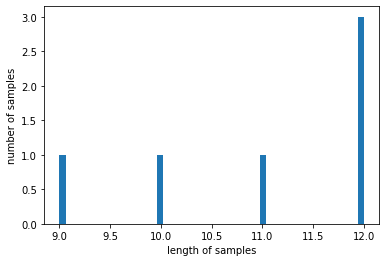

In [180]:
import token
print("기사 최대 길이 : ", max(len(news22) for news22 in tokenized_data))
print("기사 평균 길이 :", sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(news22) for news22 in tokenized_data], bins =50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [181]:
for line in tokenized_data[:3]:
    print(line)

['영상', '부산', '호', '반려동물', '테마', '파크', '주민', '반대', '하다', '이유']
['정치', '톡톡', '정치권', '성탄', '메시지', '민주당', '길', '출범', '대통령', '번째', '반려', '동']
['정치', '톡톡', '정치권', '성탄', '메시지', '민주당', '길', '출범', '대통령', '번째', '반려', '동']


In [182]:
from gensim.models import Word2Vec
model = Word2Vec(sentences= tokenized_data,vector_size=20,window = 5, min_count= 1, workers =4, sg= 0)

In [183]:
print(model.wv.most_similar("테마"))

[('안내견', 0.5595101118087769), ('이유', 0.4549636244773865), ('대통령', 0.43721216917037964), ('예산', 0.39662590622901917), ('동', 0.3873341679573059), ('관저', 0.3567226529121399), ('로', 0.3351821303367615), ('반대', 0.3341643214225769), ('번째', 0.3151710629463196), ('주인', 0.29585736989974976)]


In [184]:
model.wv.similar_by_word('반려동물')

[('정치', 0.41729575395584106),
 ('이주', 0.3821852505207062),
 ('길', 0.35702091455459595),
 ('못', 0.3342653810977936),
 ('동물', 0.31315866112709045),
 ('법안', 0.27814358472824097),
 ('주민', 0.27273717522621155),
 ('거리', 0.26760342717170715),
 ('하다', 0.2567325234413147),
 ('메시지', 0.24821870028972626)]

In [185]:
model.wv.similarity('유기동물','반대')

0.07819729

In [186]:
model.wv.similar_by_word("유기동물")

[('식구', 0.5196906328201294),
 ('동물', 0.497245728969574),
 ('신설', 0.42751187086105347),
 ('부산', 0.3210049271583557),
 ('낭비', 0.30620816349983215),
 ('번째', 0.29341986775398254),
 ('나오다', 0.2444467544555664),
 ('안내견', 0.24171392619609833),
 ('수의', 0.2229943722486496),
 ('동', 0.21289511024951935)]